## Numpy 기본
### 배열과 벡터 연산
<ul>
    <li>효율적인 다차원 배열인 ndarray는 빠른 계산과 유연한 브로드 캐스팅 기능을 제공</li>
    <li>반복문을 작성할 필요없이 데이터 배열을 빠르게 계산할 수 있는 표준 수학 함수</li>
    <li>배열 데이터를 디스크에 쓰거나 읽을 수 있는 도구와 메모리에 적재된 파일 다루는 도구</li>
    <li>선형대수, 난수 생성기, 푸리에 변환 기능</li>
    <li>C, C++ , 포트란으로 작성한 코드를 변경할수 있는 C API</li>
</ul>
Numpy 자체는 모델링이나 과학 계산을 위한 기능을 제공하지 않으므로 먼저 numpy 배열과 배열 기반 연산에 대한 이해를 한 다음 pandas 같은 배열 기반 도구를 활용하면 훨씬 더 효율적이다

In [1]:
import numpy as np

In [2]:
my_arr = np.arange(1000000)

In [3]:
my_list = list(range(1000000))

In [4]:
%time for _ in range(10):    my_arry2 = my_arr*2 # 브로드 캐스팅

CPU times: total: 0 ns
Wall time: 12.5 ms


In [5]:
%time for _ in range(10): my_list2 = [x*2 for x in my_list]

CPU times: total: 203 ms
Wall time: 396 ms


### Numpy로 작성한 코드가 순수 파이썬으로 작성한 코드보다 열배에서 백배이상 
### 빠르고 메모리도 더 적게 사용하는 것을 확인할수 있다

In [6]:
data = np.random.randn(2,3) # 랜덤으로 2행 3열의 행렬을 생성

In [7]:
data

array([[ 0.17183983, -2.41688878, -0.60694711],
       [-0.28019883,  0.55520367, -0.675195  ]])

In [8]:
data*10

array([[  1.71839827, -24.16888785,  -6.06947105],
       [ -2.80198831,   5.5520367 ,  -6.75194996]])

In [9]:
arr=[[-1,2,3,4],[2,-3,4,5],[-2,1,-3,4]]

In [10]:
list1=[]
for i in arr:
    list2=[]
    for j in i:
        list2.append(j*10)
    list1.append(list2)
list1

[[-10, 20, 30, 40], [20, -30, 40, 50], [-20, 10, -30, 40]]

In [11]:
# 강사님)
outer_list = []
for i in arr:
    inner_list = []
    for j in i:
        inner_list.append(j*10)
    outer_list.append(inner_list)
outer_list

[[-10, 20, 30, 40], [20, -30, 40, 50], [-20, 10, -30, 40]]

In [12]:
[[j*10 for j in i] for i in arr]

[[-10, 20, 30, 40], [20, -30, 40, 50], [-20, 10, -30, 40]]

In [13]:
np.shape(np.array(arr))

(3, 4)

In [14]:
# 강사님 절대값)
outer_list = []
for i in arr:
    inner_list = []
    for j in i:
        if j<0: inner_list.append(-j*10)
        else : inner_list.append(j*10)
    outer_list.append(inner_list)
outer_list

[[10, 20, 30, 40], [20, 30, 40, 50], [20, 10, 30, 40]]

In [15]:
[[-j*10 if j<0 else j*10 for j in i]for i in arr]

[[10, 20, 30, 40], [20, 30, 40, 50], [20, 10, 30, 40]]

In [16]:
data2=[[1,2,3,4],[5,6,7,8]]
arr2= np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [17]:
data2=[[1,2,3,4],[5,6,7,8]],[[111,2,3,4],[5,116,7,8]],[[1,2,3,4],[5,6,7,8]]
arr2= np.array(data2)
arr2

array([[[  1,   2,   3,   4],
        [  5,   6,   7,   8]],

       [[111,   2,   3,   4],
        [  5, 116,   7,   8]],

       [[  1,   2,   3,   4],
        [  5,   6,   7,   8]]])

In [18]:
arr2.ndim # ndim 배열의 차원

3

In [19]:
np.shape(arr2) # axis 행과 열의 개수

(3, 2, 4)

In [20]:
np.sum(data2, axis=2) # sum 총합

array([[ 10,  26],
       [120, 136],
       [ 10,  26]])

In [21]:
np.std(arr2) # std 표준편차

30.18645759644914

In [22]:
[ i(data2, axis=2)for i in [np.sum, np.mean, np.std] ]

[array([[ 10,  26],
        [120, 136],
        [ 10,  26]]),
 array([[ 2.5,  6.5],
        [30. , 34. ],
        [ 2.5,  6.5]]),
 array([[ 1.11803399,  1.11803399],
        [46.77071733, 47.35504197],
        [ 1.11803399,  1.11803399]])]

<!-- <img src="1/axis.jpg"/>
![](1/axis.jpg) -->
![1](1/axis.jpg)

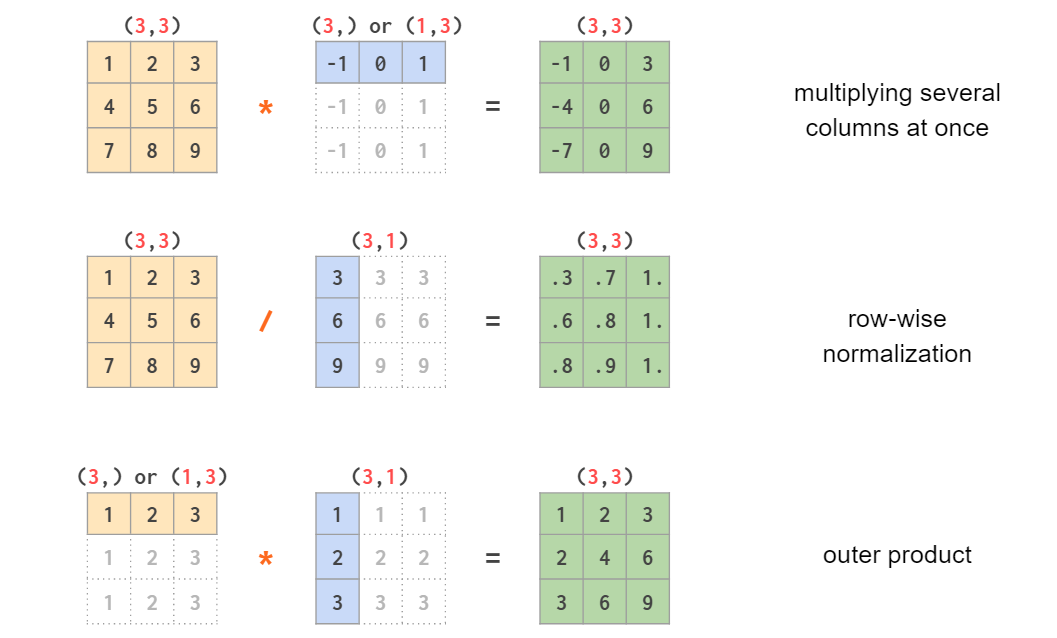

In [3]:
Image('1/broad.png')

<!-- <img src="1/broad.png"/> -->
<!-- ![](1/broad.png) -->
![images](1/broad.png)

In [23]:
x2 = np.array([[1,2,3],[3,2,4]])
np.shape(x2) # 열,행

(2, 3)

In [24]:
np.shape(x2.T) #역으로하면 행,열

(3, 2)

In [25]:
x3 = np.array([1,2,3])
np.shape(x3) # 열,없음

(3,)

In [26]:
np.dot(x2.T,x3) # x2의 행열과 x3의 행열이 맞지않아서 에러

ValueError: shapes (3,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
np.dot(x2.T,x3[:2])

In [ ]:
x3=np.array([[1,2,3],[4,5,6]]) # x3의 행열을 보여줌
x3

In [ ]:
x3.T # x3을 역으로했을때의 행열

In [ ]:
arr3=np.array([1.2,1.3,2.4])

In [ ]:
arr2.dtype # dtype은 데이터타입 줄임말, # 32비트

In [ ]:
arr3.dtype # 64비트

In [ ]:
arr4=np.array([1,2,3], dtype=np.float64)

In [ ]:
arr4.dtype

In [ ]:
numeric_strings = np.array(['1.25','9.6','42'], dtype=np.string_)

In [ ]:
numeric_strings.astype(float) # 문자열을 숫자로 형변환(type casting)

In [ ]:
try:
    numeric_strings = np.array(['1.25','9.6','42','사랑'], dtype=np.string_)
except:
    print("문자는 실수로 형변환 불가")

In [ ]:
try:
    numeric_strings = np.array(['1.25','9.6','42'], dtype=np.string_)
    v = numeric_strings.astype(float)
    print(v)
except:
    print("문자는 실수로 형변환 불가")

In [ ]:
def f(x):
    x_=np.array(x)
    list_=[]
    try:
        list_.append(x_.astype(float).astype(int))
        return list_
    except:
        return 0

In [ ]:
[f(i) for i in [['사랑','1.2','3.6'],['증오'],[2.3,11,5]]]

In [ ]:
arr=np.array([[1,2,3],[4,5,6]])
arr

In [ ]:
# arr*arr 을 파이썬으로 프로그래밍하자
list1=[]
for i in arr:
    list2=[]
    for j in i:
        list2.append(j*j)
    list1.append(list2)
list1 

In [ ]:
#강사님)
[[i*i for i in j ] for j in arr]

In [ ]:
# 문제2) 함수를만들어서 두번째 인자만큼 제곱을 한다
# 3을 전달하면 3승 5를 전달하면 5승

def f(x,y):
    list1=[]
    for i in x:
        list2=[]
        for j in i:
            list2.append(j**y)
        list1.append(list2)
    return list1

In [ ]:
f(arr,5)

In [ ]:
def pow_(a, b):
    mul_=1
    for _ in range(b):
        mul_*=a
    return mul_

In [ ]:
# 강사님)
[[pow_(i,5) for i in j] for j in arr]
# [[[pow_(i,k) for i in j] for j in arr] for k in range(7)]

## 색인과 슬라이싱 기초

In [ ]:
arr = np.arange(10)
arr

In [ ]:
arr[5] # 0부터 시작하므로 6번째 위치

In [ ]:
print(arr[5:8],arr[:2],arr[4:])

In [ ]:
print(arr[-3:],arr[-3:-1])

In [ ]:
arr = np.arange(10)

In [ ]:
arr[:]=32
arr

In [ ]:
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2d[2]

In [ ]:
arr2d[:][:1]

In [ ]:
arr2d[1:][:2]

In [ ]:
arr2d[1:,:2] # 1열부터 끝까지, 처음부터 2행까지

In [ ]:
arr2d[:2,:2]

In [ ]:
arr2d_list=[[1,2,3],[4,5,6],[7,8,9]]
arr2d_list[:2][0][:2],arr2d_list[:2][1][:2]

In [ ]:
arr2d[:,:1]

In [ ]:
np.shape(arr2d)

In [ ]:
arr2d[:,0]

In [ ]:
np.shape(arr2d[:,0])

In [ ]:
arr2d[:,[0]]

In [ ]:
np.shape(arr2d[:,[0]])

In [ ]:
arr3d=np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])
arr3d

In [ ]:
arr3d[0]

In [ ]:
old_values = arr3d[0].copy()
arr3d[0]=42 # 전체에 적용함
arr3d

In [ ]:
arr3d[0] = old_values
arr3d

In [ ]:
arr3d[1,0,2]

<!-- <img src="1/3d.png"/> -->
![](1/3d.png)

In [ ]:
arr3d=np.array([
    [[1,2,3,11],[4,5,6,17]] ,
    [[7,8,9,23],[ 10,11,12,36]],
     [[72,82,92,232],[ 102,121,122,326]],
     [[71,18,19,123],[ 101,111,121,136]]
])
arr3d

In [ ]:
# 3,9,92,19출력
np.shape(arr3d[:,:1,2:3])

In [ ]:
# 3,9,92,19출력
np.shape(arr3d[:,0,2:3])

In [ ]:
np.shape(arr3d)

In [32]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)

In [34]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

In [35]:
names[names=='Bob']

array(['Bob', 'Bob'], dtype='<U4')

In [36]:
#문제 ) Will과 Joe 선택
names[names != 'Bob']

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [37]:
#문제 ) Will과 Joe 선택
names[(names == 'Will') | (names=='Joe')]

array(['Joe', 'Will', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [38]:
print(data[0],data[3])

[ 0.97053147  0.02527918  1.37968336 -1.7075283 ] [ 0.51774373 -0.39884878 -0.56002567  0.07448313]


In [33]:
data[names=='Bob'] #'불리언 배열을 배열의 index로 사용 가능

array([[ 0.97053147,  0.02527918,  1.37968336, -1.7075283 ],
       [ 0.51774373, -0.39884878, -0.56002567,  0.07448313]])

In [148]:
names1=np.array([[['홍','길동','국제']]])
data=np.array([[[11,12],[13,17]],[[4,3],[1,7]],[[5,4],[8,-1]]])

In [162]:
names1[0][0]=='길동'

array([False,  True, False])

In [167]:
names1[0,0]

array(['홍', '길동', '국제'], dtype='<U2')

In [165]:
data[names1[0,0]=='길동']

array([[[4, 3],
        [1, 7]]])

In [170]:
names=np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4) #7행, 4열

In [171]:
data[data<0]=0
data

array([[1.07590711, 0.        , 2.68653157, 0.        ],
       [0.23335295, 0.        , 0.7070343 , 1.30976848],
       [0.73086346, 0.        , 0.10553185, 0.        ],
       [0.47743715, 0.        , 0.64782806, 1.32197121],
       [0.29824502, 0.32468843, 0.        , 0.93537435],
       [0.        , 0.70309547, 0.67953453, 0.85638415],
       [0.        , 1.45390432, 0.03125554, 0.        ]])

In [173]:
arr = np.arange(15).reshape((3,5)) # 5행 3열을 -> 3행,5열
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [174]:
arr.T # 3행, 5열

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [195]:
arr1 = np.arange(24).reshape((6,4)) # 6행 4열
arr1

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [196]:
arr1.T

array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

In [206]:
arr_a =np.arange(3*6*4).reshape((3,6,4))[:,:,2]
arr_symetry_matrix = np.dot(arr_a,arr_a.T)

In [216]:
np.linalg.inv(arr_symetry_matrix)

array([[ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12],
       [-8.19069391e+12,  1.63813878e+13, -8.19069391e+12],
       [ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12]])

In [225]:
arr_symetry_matrix_inv = np.linalg.inv(arr_symetry_matrix)  #역행렬
arr_symetry_matrix_inv

array([[ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12],
       [-8.19069391e+12,  1.63813878e+13, -8.19069391e+12],
       [ 4.09534695e+12, -8.19069391e+12,  4.09534695e+12]])

In [226]:
mul_ = np.dot(arr_symetry_matrix, arr_symetry_matrix_inv) 
mul_

array([[-4.72656250e-01, -2.43750000e+00,  2.20312500e+00],
       [-3.90625000e-03, -1.93750000e+00,  2.82812500e+00],
       [-3.53515625e+00,  6.56250000e+00,  7.45312500e+00]])

In [208]:
arr_symetry_matrix.T

array([[ 1144,  2872,  4600],
       [ 2872,  8056, 13240],
       [ 4600, 13240, 21880]])

In [209]:
from sympy import *

In [211]:
arr_symetry_matrix.diagonal()

array([ 1144,  8056, 21880])

In [227]:
Q,R = np.linalg.qr(arr_symetry_matrix) # QR 분해(Q는 직교행렬, R은 상 삼각행렬)
R # 우상단에만 값이 있다

array([[-5.54230277e+03, -1.57563388e+04, -2.59703748e+04],
       [ 0.00000000e+00, -4.27678229e+02, -8.55356458e+02],
       [ 0.00000000e+00,  0.00000000e+00, -1.90233853e-13]])

In [230]:
Q

array([[-0.2064124 ,  0.88922846,  0.40824829],
       [-0.51819616,  0.25457037, -0.81649658],
       [-0.82997992, -0.38008771,  0.40824829]])

In [234]:
np.dot(Q[0], Q[1]) # 값이 0처럼 안보여도 0, 벡터가 0이면 수직

-1.6653345369377348e-16

In [239]:
np.dot(Q[0].T, Q[1].T) # 0

-1.6653345369377348e-16

In [235]:
np.dot(Q[2], Q[1]) # 0

0.0

In [240]:
np.dot(Q[2].T, Q[1].T) # 0

0.0

In [238]:
np.dot(Q[2], Q[0]) # 0

-1.1102230246251565e-16

In [241]:
np.dot(Q[2].T, Q[0].T) # 0

-1.1102230246251565e-16

In [233]:
if np.dot(Q[0], Q[1]) < 0.000001:
    print('참')

참


In [214]:
W,V = np.linalg.eig(arr_symetry_matrix)
[W,V]

[array([3.08920526e+04, 1.87947369e+02, 2.37882327e-13]),
 array([[-0.17932603, -0.89508408,  0.40824829],
        [-0.51023026, -0.27018218, -0.81649658],
        [-0.8411345 ,  0.35471972,  0.40824829]])]

In [243]:
kwon = np.random.randn(4,4)

In [244]:
Q,R = np.linalg.qr(kwon)
Q

array([[-0.89410938,  0.16333289,  0.33957203, -0.2420364 ],
       [-0.16102747, -0.77114433,  0.32143927,  0.52543636],
       [-0.36148205, -0.35289957, -0.85664552, -0.10464736],
       [-0.20968857,  0.50410384, -0.21800477,  0.80894001]])

In [247]:
np.dot(Q[0],Q[1])

-9.71445146547012e-17

In [250]:
np.dot(Q[0].T,Q[1].T)

-9.71445146547012e-17

In [280]:
points = np.arange(-5,5,0.01)
points[:2]

array([-5.  , -4.99])

In [281]:
xs,ys = np.meshgrid(points, points)
xs[:3]

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [282]:
z=np.sqrt(xs**2+ys**2)
z[:3]

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815]])

In [283]:
import matplotlib.pyplot as plt

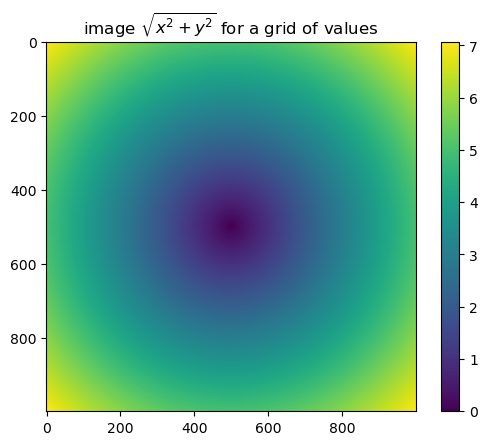

In [327]:
plt.imshow(z,cmap=plt.cm.viridis)
plt.colorbar()
plt.title("image $\\sqrt{x^2+y^2}$ for a grid of values")
plt.show()

In [1]:
!pip install IPython #이미지 업로드위한 파일설치

In [2]:
from IPython.display import Image